In [3]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics  # Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('house-votes-84.data.txt',header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       435 non-null    object
 1   1       435 non-null    object
 2   2       435 non-null    object
 3   3       435 non-null    object
 4   4       435 non-null    object
 5   5       435 non-null    object
 6   6       435 non-null    object
 7   7       435 non-null    object
 8   8       435 non-null    object
 9   9       435 non-null    object
 10  10      435 non-null    object
 11  11      435 non-null    object
 12  12      435 non-null    object
 13  13      435 non-null    object
 14  14      435 non-null    object
 15  15      435 non-null    object
 16  16      435 non-null    object
dtypes: object(17)
memory usage: 57.9+ KB


In [7]:
mapped_class = {"republican": 0, "democrat": 1}
df[0] = df[0].map(lambda x: mapped_class[x])

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,0,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,1,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,1,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,1,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [13]:
mapped_class = {"n": 0, "y": 1,'?':'?'}
for col in df.columns.drop(0):
    df[col] = df[col].map(lambda x: mapped_class[x])

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,1,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,1,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


In [15]:
for col in df.columns.drop(0):
    df[col] = df[col].replace(['?'],df[col].mode()[0])

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,1,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,1,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [17]:
Y=df[0]

In [18]:
X=df.iloc[:,1:]

_________________Traning Set = 25.0 %_____________________

Accuracy of try no. 1  = 0.9480122324159022
TreeSize of try no. 1  = 17


Accuracy of try no. 2  = 0.944954128440367
TreeSize of try no. 2  = 21


Accuracy of try no. 3  = 0.9357798165137615
TreeSize of try no. 3  = 19


Accuracy of try no. 4  = 0.9051987767584098
TreeSize of try no. 4  = 27


Accuracy of try no. 5  = 0.9418960244648318
TreeSize of try no. 5  = 19


Minimum Accuracy = 0.9051987767584098
Maximum Accuracy = 0.9480122324159022
Mean of Accuracy = 0.9351681957186544
Minimum Tree = 17
Maximum Tree = 27
Mean of Tree = 20
_______________________________________________________

_________________Traning Set = 30.000000000000004 %_____________________

Accuracy of try no. 1  = 0.9442622950819672
TreeSize of try no. 1  = 23


Accuracy of try no. 2  = 0.940983606557377
TreeSize of try no. 2  = 21


Accuracy of try no. 3  = 0.9573770491803278
TreeSize of try no. 3  = 27


Accuracy of try no. 4  = 0.9377049180327869
TreeSiz

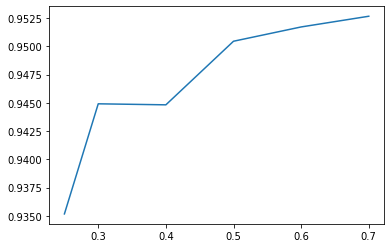

_______________________________________________________

_____________________TREE SIZE_________________________


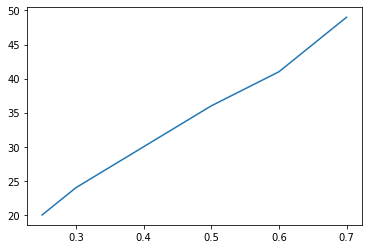

_______________________________________________________


In [39]:
test = [0.75, 0.7, 0.6, 0.5, 0.4, 0.3]
rand = [1, 2, 3, 4, 5]
graphAcc = []
graphSize = []
for x in test:
    mina=1
    maxa=0
    at=0
    mins=10**100
    maxs=0
    st=0
    
    print('_________________Traning Set =',100*(1-x),'%_____________________\n')
    for i in range(5):
        # Split dataset into training set and test set
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=x, random_state = rand[i])  # 25% training and 75% test for first one
        
        # Create Decision Tree classifer object
        clf = DecisionTreeClassifier()

        # Train Decision Tree Classifer
        clf = clf.fit(X_train, y_train)

        # Predict the response for test dataset
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        
        print("Accuracy of try no.", i + 1, " =", acc)
        
        treeObj = clf.tree_ 
        treeSize = treeObj.node_count
        print("TreeSize of try no.", i + 1, " =", treeSize)
        if(acc < mina):
            mina = acc
        if(acc > maxa):
            maxa = acc
        if(treeSize < mins):
            mins = treeSize
        if(treeSize > maxs):
            maxs = treeSize
        at =at + acc
        st = st + treeSize
        print('\n')
    print("Minimum Accuracy =", mina)
    print("Maximum Accuracy =", maxa)
    print("Mean of Accuracy =", at/5)
    graphAcc.append(at/5)

    print("Minimum Tree =", mins)
    print("Maximum Tree =", maxs)
    print("Mean of Tree =", (int)(st/5) )
    graphSize.append((int)(st/5))
    print('_______________________________________________________\n')

train = [1 - x for x in test] 
print('_____________________ACCURACY_________________________')   
plt.plot(train , graphAcc)
plt.show()
print('_______________________________________________________\n')   
print('_____________________TREE SIZE_________________________')  
plt.plot(train , graphSize)
plt.show()
print('_______________________________________________________')  